# Bee Population Data EDA: Time-Series EDA

This notebook emphasizes time series EDA for annual colony counts across states in the United States of America. As cited by the Australian Academy of Science, a standard honeybee hive houses approximately 60,000 to 80,000 individuals. Utilizing time-series methodologies, our objective is to discern patterns and fluctuations in bee populations over time. Later, we will be employing air quality metrics to possibly predict and forecast changes in bee populations.

In [75]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import folium
import geopandas as gpd

# From the terminal, you may need to nstall GeoPandas and folium. Please see documentation

---
### Loading bee data and extracting essential insights from the DataFrame.

In [81]:
df_bee = pd.read_csv('./Data_Bees/processed_dfs/state_survey_processed.csv')
df_bee.drop(columns = ['Unnamed: 0'], inplace = True)
df_bee.set_index(['Year'])
df_bee['State'] = df_bee['State'].str.capitalize()
df_bee.head()

,Year,State,Value
0,1987,Alabama,46000
1,1987,Arizona,80000
2,1987,Arkansas,29000
3,1987,California,540000
4,1987,Colorado,44000


In [3]:
df_bee.shape

(1343, 3)

In [4]:
df_bee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1343 entries, 0 to 1342
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    1343 non-null   int64 
 1   State   1343 non-null   object
 2   Value   1343 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 31.6+ KB


---
### Summary Statistics

In [5]:
df_bee.describe()

,Year,Value
count,1343.000000,1.343000e+03
mean,2001.618019,8.409993e+04
std,9.074253,2.149854e+05
min,1987.000000,1.000000e+03
25%,1994.000000,1.100000e+04
50%,2001.000000,3.300000e+04
75%,2009.000000,8.000000e+04
max,2017.000000,4.235000e+06


---
### Map of Bee Colony Values in the United States

*citations:*
[StackOverflow]('https://stackoverflow.com/questions/78004175/python-folium-combine-states-in-choropleth-map-of-usa'), [GeoPandas documentation]('https://geopandas.org/en/stable/getting_started/install.html'), [Folium]('https://python-visualization.github.io/folium/latest/index.html'), [GeoPandas plotting polygons]('https://geopandas.org/en/stable/gallery/polygon_plotting_with_folium.html')

In [115]:
df_bee_avg = df_bee.groupby('State')['Value'].mean()

# Download US states map
# Download the US states GeoJSON file
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'
us_states_geojson = gpd.read_file(url)


#merge map and df_bee_avg
merged_geo = us_states_geojson.merge(df_bee_avg, how = 'left', left_on = 'name', right_on  = 'State')


# Create a Folium map centered on the US
bee_map = folium.Map(location=[37, -102], zoom_start=4)


# mapping with folium.Chorapleth()
folium.Choropleth(
    geo_data = us_states_geojson,
    name = 'choropleth',
    data = merged_geo, 
    columns = ['name', 'Value'],
    key_on = 'feature.properties.name',
    fill_color = 'YlGnBu',
    fill_opacity = 0.3,
    line_opacity = 0.7, 
    legend_name = 'Bee Colony Values'
).add_to(bee_map)


# saving map
bee_map.save('./images_marta/bee_map.html')  #display in readme using ,img src = 'bee_map.html'

#display map
bee_map

### Visualizing Bee Colony Counts Across States, 1987-2017
The line plots depict the evolution of bee colony counts in each state over the period 1987 to 2017.

The initial plot showcases all 50 states together for a comprehensive overview.
The subsequent plot shows bee colonies by region, as specified in this dictionary:

citation: [GitHubGist us_regions.py]('https://gist.github.com/sfirrin/fd01d87f022d80e98c37a045c14109fe')

In [116]:
# Add 'Region' column to df_bee

states_to_regions = {
    'Washington': 'West', 'Oregon': 'West', 'California': 'West', 'Nevada': 'West',
    'Idaho': 'West', 'Montana': 'West', 'Wyoming': 'West', 'Utah': 'West',
    'Colorado': 'West', 'Alaska': 'West', 'Hawaii': 'West', 'Maine': 'Northeast',
    'Vermont': 'Northeast', 'New York': 'Northeast', 'New Hampshire': 'Northeast',
    'Massachusetts': 'Northeast', 'Rhode Island': 'Northeast', 'Connecticut': 'Northeast',
    'New Jersey': 'Northeast', 'Pennsylvania': 'Northeast', 'North Dakota': 'Midwest',
    'South Dakota': 'Midwest', 'Nebraska': 'Midwest', 'Kansas': 'Midwest',
    'Minnesota': 'Midwest', 'Iowa': 'Midwest', 'Missouri': 'Midwest', 'Wisconsin': 'Midwest',
    'Illinois': 'Midwest', 'Michigan': 'Midwest', 'Indiana': 'Midwest', 'Ohio': 'Midwest',
    'West Virginia': 'South', 'District of Columbia': 'South', 'Maryland': 'South',
    'Virginia': 'South', 'Kentucky': 'South', 'Tennessee': 'South', 'North Carolina': 'South',
    'Mississippi': 'South', 'Arkansas': 'South', 'Louisiana': 'South', 'Alabama': 'South',
    'Georgia': 'South', 'South Carolina': 'South', 'Florida': 'South', 'Delaware': 'South',
    'Arizona': 'Southwest', 'New Mexico': 'Southwest', 'Oklahoma': 'Southwest',
    'Texas': 'Southwest'}
df_bee['Region'] = df_bee['State'].map(states_to_regions)

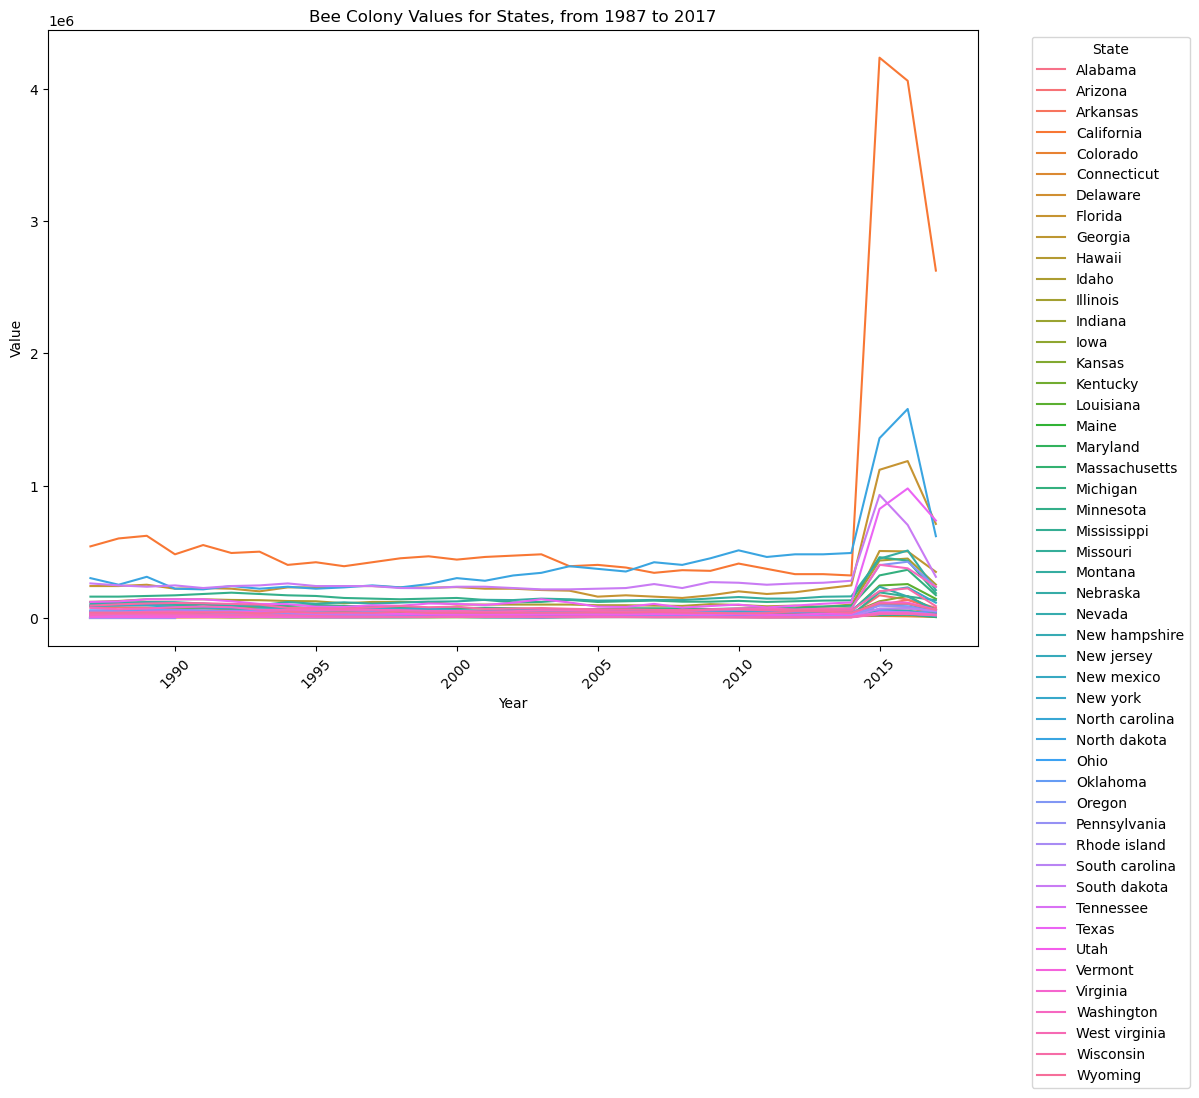

In [117]:
# Plot bee values for all states, all years
plt.figure(figsize=(12, 8));
sns.lineplot(data=df_bee, x='Year', y='Value', hue='State');
plt.title('Bee Colony Values for States, from 1987 to 2017');
plt.xlabel('Year');
plt.ylabel('Value');
plt.legend(title='State', bbox_to_anchor=(1.05, 1));
plt.xticks(rotation=45);

# Saving Figure to Images Folder
plt.savefig('./images_marta/line_colony_values_state_allyears')

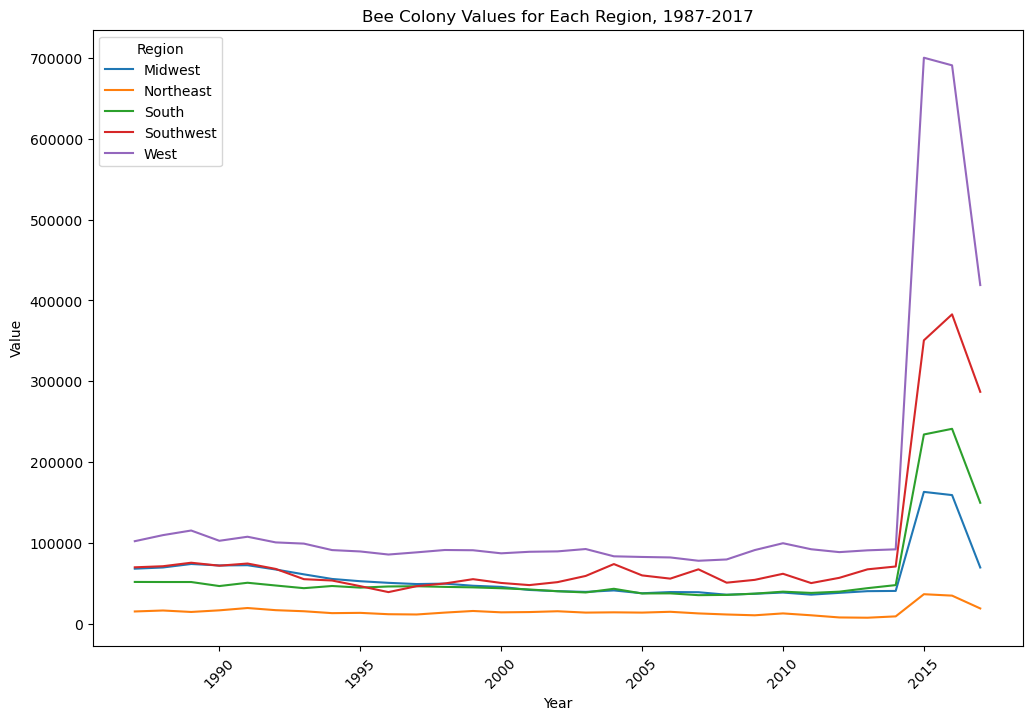

In [118]:
df_region_year = df_bee.groupby(['Year', 'Region'])['Value'].mean().reset_index()
# Plotting the line plot
plt.figure(figsize=(12, 8));
sns.lineplot(data=df_region_year, x='Year', y='Value', hue='Region', palette='tab10');
plt.title('Bee Colony Values for Each Region, 1987-2017');
plt.xlabel('Year');
plt.ylabel('Value');
plt.legend(title='Region');
plt.xticks(rotation=45);

# Saving Figure to Images Folder
plt.savefig('./images_marta/line_colony_values_regions_allyears')

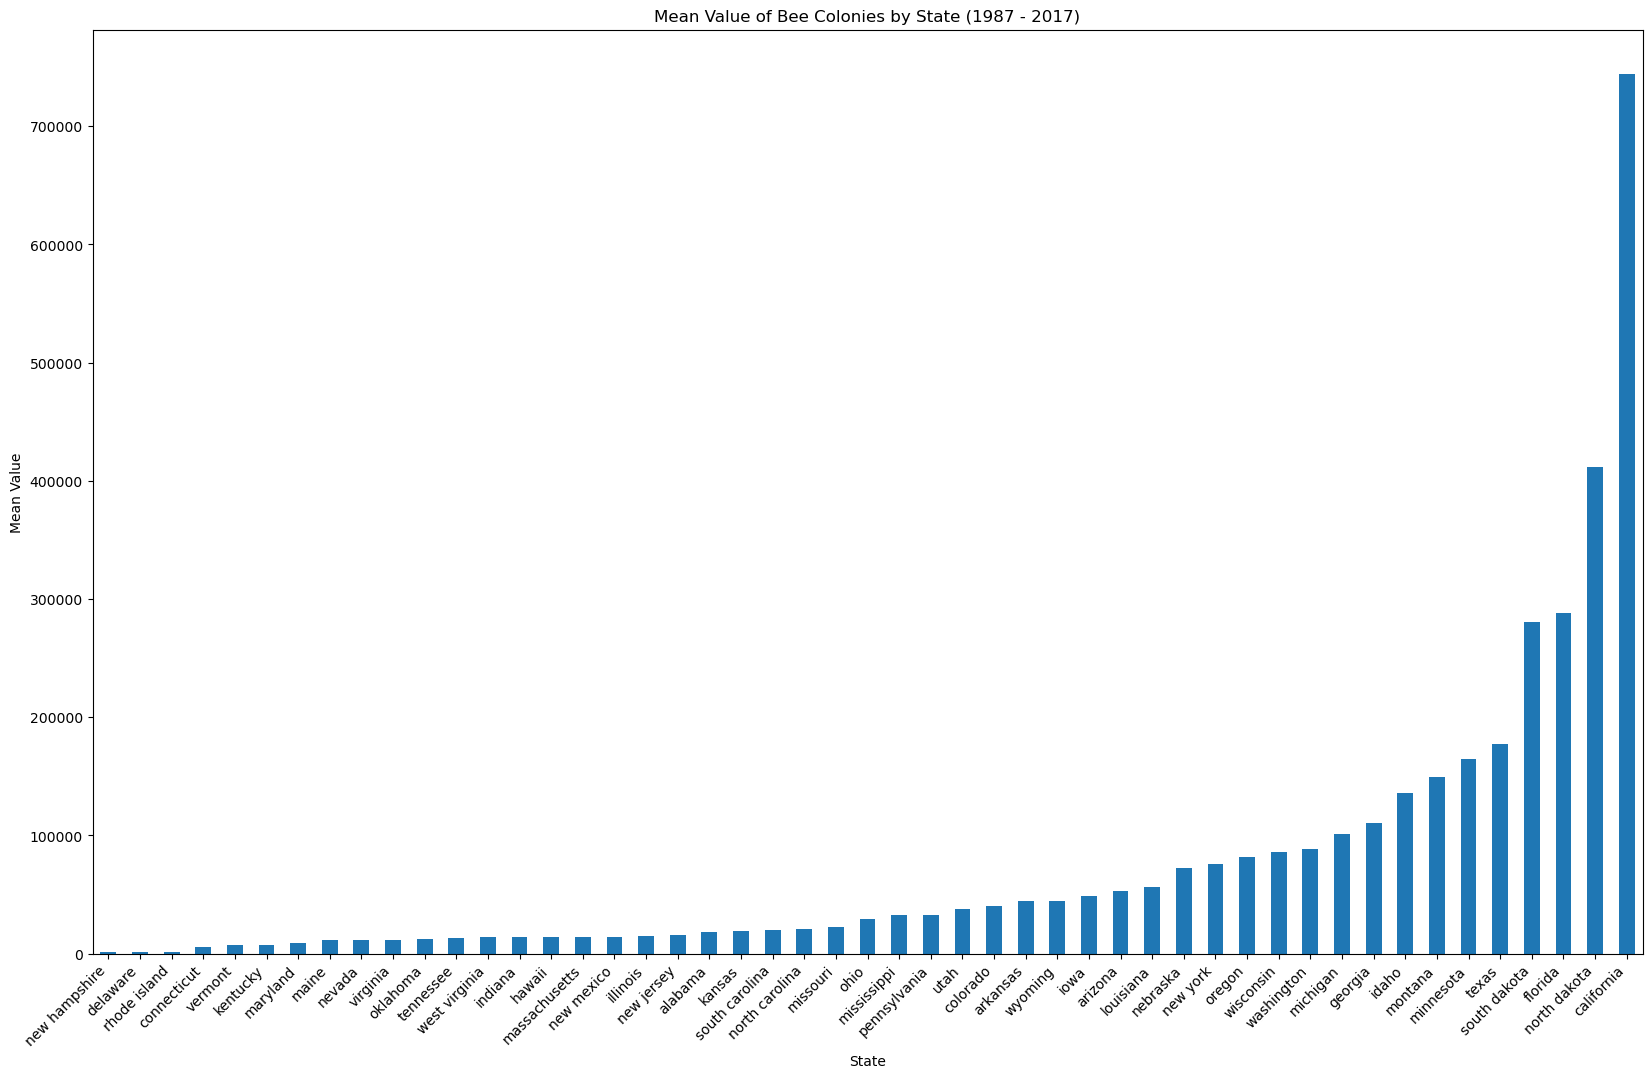

In [9]:
plt.figure(figsize = (20, 12))
df_bee.groupby('State')['Value'].mean().sort_values().plot(kind = 'bar');

plt.title('Mean Value of Bee Colonies by State (1987 - 2017)');
plt.xlabel('State');
plt.ylabel('Mean Value');
plt.xticks(rotation=45, ha = 'right');

# Saving Figure to Images Folder
plt.savefig('./images_marta/bar_mean_colony_values')

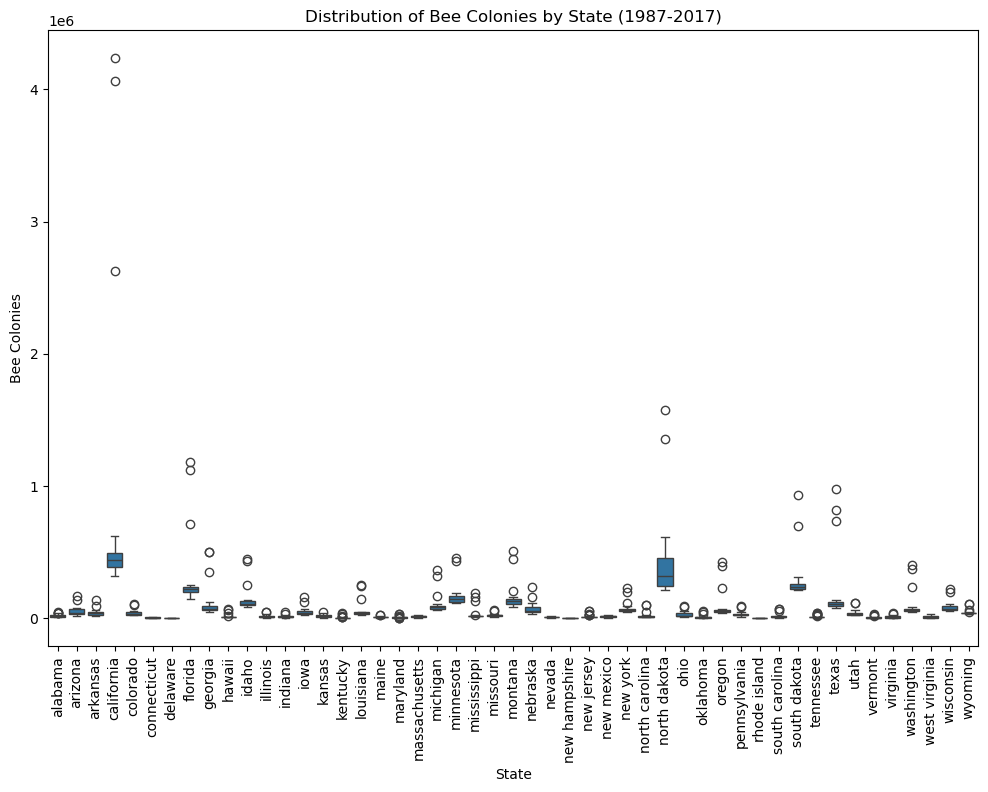

In [10]:
plt.figure(figsize=(12, 8));
sns.boxplot(data=df_bee, x='State', y='Value');
plt.title('Distribution of Bee Colonies by State (1987-2017)');
plt.xlabel('State');
plt.ylabel('Bee Colonies');
plt.xticks(rotation=90);  


(0.0, 700000.0)

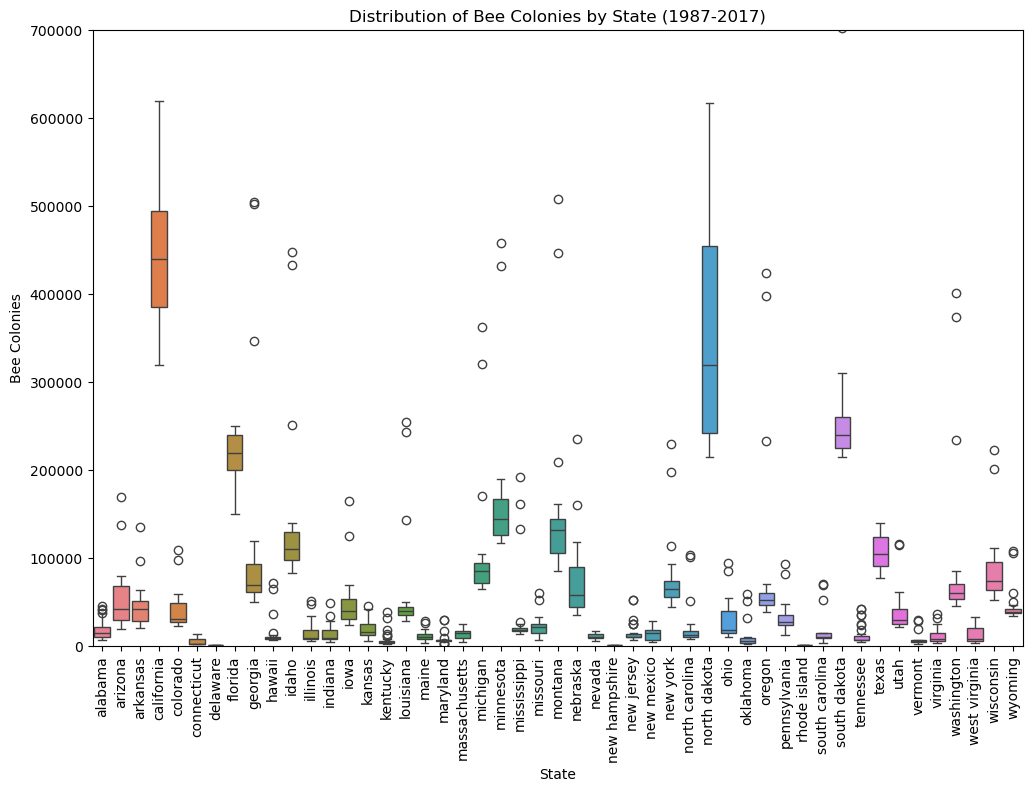

In [11]:
plt.figure(figsize=(12, 8));
sns.boxplot(data=df_bee, x='State', y='Value', hue = 'State');
plt.title('Distribution of Bee Colonies by State (1987-2017)');
plt.xlabel('State');
plt.ylabel('Bee Colonies');
plt.xticks(rotation=90)  
plt.ylim(0, 700000)

---
### Setting up a time series

In [14]:
df_bee['Year'] = pd.to_datetime(df_bee['Year'], format = '%Y' )
df_bee.set_index('Year', inplace = True)
df_bee.index = df_bee.index.strftime('%Y')


In [41]:
df_bee.head()

,State,Value
Year,,
1987,alabama,46000
1987,arizona,80000
1987,arkansas,29000
1987,california,540000
1987,colorado,44000


In [42]:
bees_by_year = df_bee.groupby(by = 'Year')[['Value']].sum()
bees_by_year.head()

,Value
Year,
1987,3316000
1988,3370000
1989,3528000
1990,3220000
1991,3199000


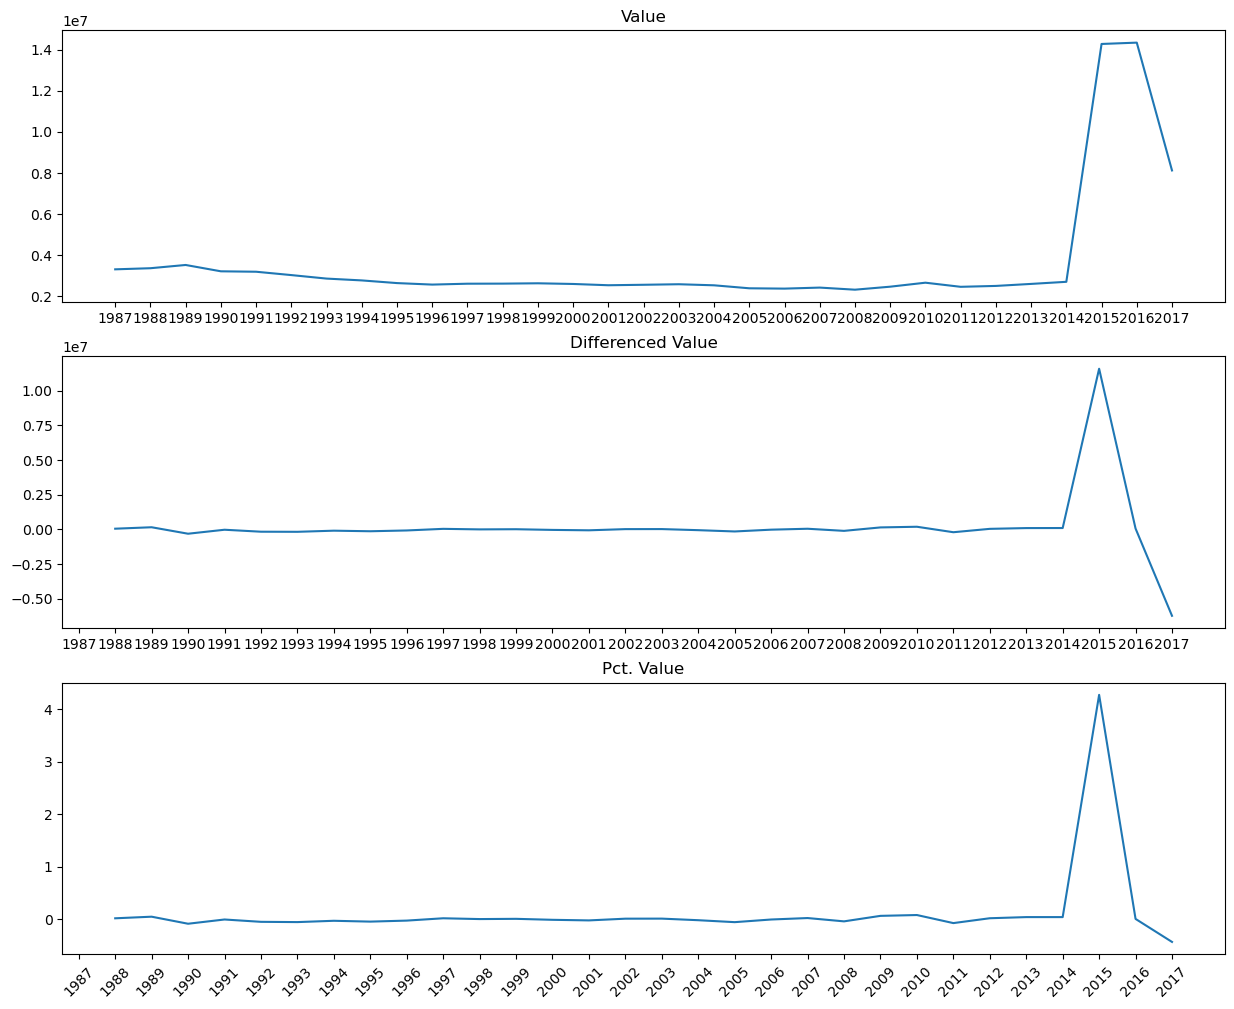

In [74]:
# If we keep all 3, have a good argument/comment for it. Otherwise, keep one and chat it up

fig, axes = plt.subplots(3, 1, figsize = (15, 12))
plt.xticks(rotation = 45);

axes[0].plot(bees_by_year['Value'])
axes[1].plot(bees_by_year['Value'].diff())
axes[2].plot(bees_by_year['Value'].pct_change())

axes[0].title.set_text('Value')
axes[1].title.set_text('Differenced Value')
axes[2].title.set_text('Pct. Value')


### Decomposing the time series using seasonal_decompose from statsmodels
Plotting: trend, seasonal, and residual components

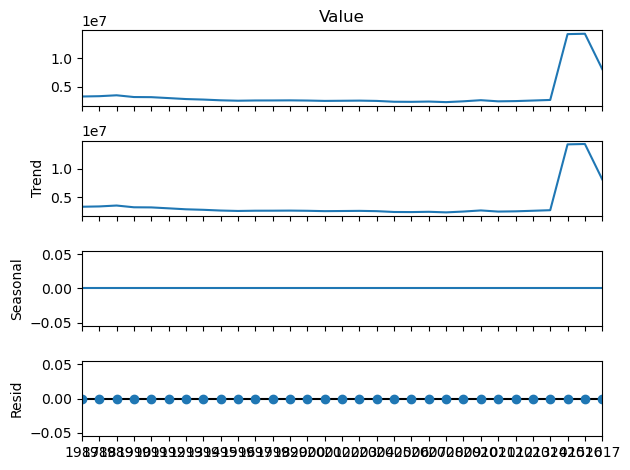

In [52]:
seasonal_decompose(bees_by_year['Value'], period = 1).plot();
# defaults to additive model

*citation:* [StackOverflow]('https://stackoverflow.com/questions/62897548/why-am-i-getting-a-line-shadow-in-a-seaborn-line-plot#:~:text=By%20default%2C%20sns.,confidence%20interval%20of%20the%20estimate.')

There is line shadow showing the confidence interval, because the dataset contains multiple y values for each x value. By default, sns.lineplot() will estimate the mean by aggregating over multiple y values at each x value.
After aggregation, the mean of y values at each x value will be plotted as a line. The line shadow represents the 95% confidence interval of the estimate.

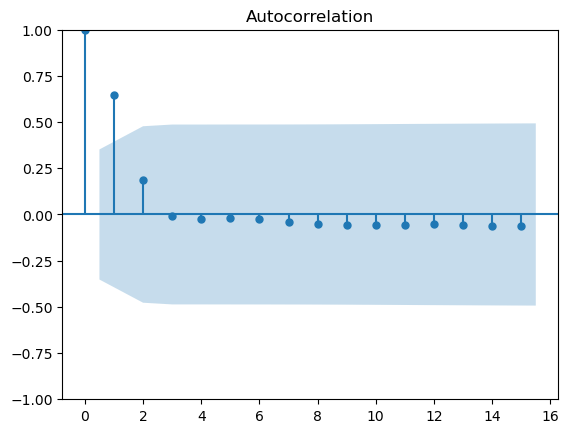

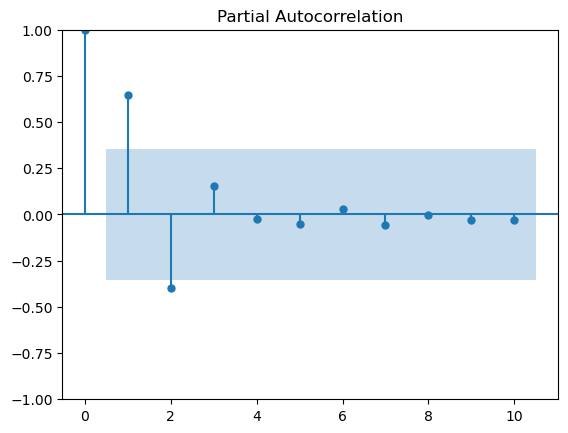

In [57]:
# Autocorrelation and partial autocorrelations plots
plot_acf(bees_by_year['Value']);
plot_pacf(bees_by_year['Value'], lags = 10);

# lag of 1 is significant, otherwise no
